# 盘中动态:20241126

In [1]:
import nbimporter
from 盘前作业20241126 import plotStock,DataFramePretty
import akshare as ak

repday='20241126'

## 1. 今日板块热点


![今日涨幅国泰君安APP](gtja.png)

#### 2.2.1 集合竞价概念板块排名

In [2]:
import datetime
import os
import pandas as pd

#记录排名
# basename: 板块类型（概念板块、行业板块）
# start_time, end_time: 排名时间段
# sector: 板块名称
def recordRank(basename,start_time,end_time):
    now = datetime.datetime.now()
    tStr = end_time.strftime("%Y%m%d%H%M")
    csvfile=f'{basename}{tStr}.txt'
    if now.time() < end_time and now.time() >= start_time:
        if basename=='conceptRank':
            rank=ak.stock_board_concept_name_em()
        elif basename=='industryRank':
            rank=ak.stock_board_industry_name_em()
        rank.to_csv(csvfile)
    else:
        if os.path.exists(csvfile):
            rank=pd.read_csv(csvfile)
        else:
            print('非指定时间段，没有数据源.')
            rank=pd.DataFrame()
    if not rank.empty:
        mvtotal=rank['总市值'].sum()
        rank['市值比']=rank['总市值']/mvtotal
        rank['上涨家数%']=rank['上涨家数']/(rank['上涨家数']+rank['下跌家数'])
        columns=['排名','板块名称','板块代码','涨跌幅','市值比','换手率','上涨家数%','领涨股票','领涨股票-涨跌幅']
        rank=rank[columns]
    return rank

#排名靠前的板块的股票明细排名
# sectorRankDf: 板块排名DataFrame(recordRank生成)
# sectorNum,stockNum: 返回板块数、股票数
def top5sectorStocks(basename,start_time,end_time,sectorRankDf,sectorNum=5,stockNum=5):
    top5={}
    now = datetime.datetime.now()
    tStr = start_time.strftime("%Y%m%d%H%M")
    if sectorRankDf.empty:
        print('非指定时间段，没有数据源。')
    else:
        print('排名前5领涨板块成分股列表。')
        for sym in sectorRankDf['板块名称'].to_list()[:5]:
            csvfile=f'{basename}_{sym}{tStr}.txt'
            if now.time() < end_time and now.time() >= start_time:
                if basename=='conceptRank':
                    top5[sym]=ak.stock_board_concept_cons_em(sym)
                else:
                    top5[sym]=ak.stock_board_industry_cons_em(sym)
                top5[sym].to_csv(csvfile)
            else:
                if os.path.exists(csvfile):
                    top5[sym]=pd.read_csv(csvfile)
                else:
                    print('No record stored and not available from source.')
                    top5[sym]=pd.DataFrame()

            if not top5[sym].empty:
                atotal=top5[sym]['成交额'].sum()
                top5[sym]['成交额比']=top5[sym]['成交额']/atotal
                columns=['代码','名称','涨跌幅','成交额','换手率','市盈率-动态','市净率']
                top5[sym]=top5[sym][columns][:stockNum]
                print(f'板块：{sym}:\n{top5[sym]}\n\n')
    return top5   

In [3]:
#当天集合竞价阶段概念板块排名
basename='conceptRank'
start_time = datetime.time(9, 15)
end_time = datetime.time(9, 31)
rank0=recordRank(basename,start_time,end_time)
rank0.head(20)

,排名,板块名称,板块代码,涨跌幅,市值比,换手率,上涨家数%,领涨股票,领涨股票-涨跌幅
0,1,昨日涨停_含一字,BK1050,7.49,0.000712,0.0,0.920732,殷图网联,20.45
1,2,昨日涨停,BK0815,7.18,0.000627,0.0,0.911565,殷图网联,20.45
2,3,昨日连板_含一字,BK1051,5.70,0.000214,0.0,0.804348,贝仕达克,20.02
3,4,盲盒经济,BK0954,4.94,0.000075,0.0,0.900000,金运激光,14.97
4,5,昨日连板,BK0816,4.14,0.000122,0.0,0.724138,贝仕达克,20.02
5,6,AI制药,BK1170,2.53,0.000085,0.0,0.454545,理邦仪器,20.03
6,7,高带宽内存,BK1152,2.30,0.000093,0.0,0.750000,华海诚科,20.00
7,8,数字水印,BK1129,2.06,0.000068,0.0,0.785714,金运激光,14.97
8,9,血氧仪,BK1122,1.90,0.000089,0.0,0.500000,理邦仪器,20.03
9,10,气溶胶检测,BK1065,1.89,0.000134,0.0,0.625000,禾信仪器,19.93


In [4]:
top5_concept_stocks=top5sectorStocks(basename,start_time,end_time,rank0)

排名前5领涨板块成分股列表。
板块：昨日涨停_含一字:
       代码    名称    涨跌幅  成交额  换手率  市盈率-动态    市净率
0  835508  殷图网联  20.45  NaN  0.0 -245.15  13.29
1  300206  理邦仪器  20.03  NaN  0.0   42.59   4.84
2  300822  贝仕达克  20.02  NaN  0.0  107.09   6.66
3  300530  领湃科技  20.01  NaN  0.0  -26.56  73.62
4  300448  浩云科技  20.00  NaN  0.0  538.00   4.63


板块：昨日涨停:
       代码    名称    涨跌幅  成交额  换手率  市盈率-动态    市净率
0  300822  贝仕达克  20.02  NaN  0.0  107.09   6.66
1  300530  领湃科技  20.01  NaN  0.0  -26.56  73.62
2  835508  殷图网联  20.00  NaN  0.0 -244.24  13.24
3  300448  浩云科技  20.00  NaN  0.0  538.00   4.63
4  301011  华立科技  19.98  NaN  0.0   48.49   6.16


板块：昨日连板_含一字:
       代码    名称    涨跌幅  成交额  换手率   市盈率-动态    市净率
0  300822  贝仕达克  20.02  NaN  0.0   107.09   6.66
1  300220  金运激光  14.53  NaN  0.0  2273.11  50.90
2  600979  广安爱众  10.10  NaN  0.0    21.90   1.53
3  600105  永鼎股份  10.06  NaN  0.0   136.63   3.58
4  600228  返利科技  10.05  NaN  0.0  -891.58   7.64


板块：盲盒经济:
       代码    名称    涨跌幅  成交额  换手率   市盈率-动态    市净率
0  300220  金运激光 

#### 2.2.3 开盘后15分钟概念板块排名

In [5]:
start_time = datetime.time(9, 31)
end_time = datetime.time(9, 52)
rank1=recordRank(basename,start_time,end_time)
rank1.head(20)

,排名,板块名称,板块代码,涨跌幅,市值比,换手率,上涨家数%,领涨股票,领涨股票-涨跌幅
0,1,盲盒经济,BK0954,5.94,0.000076,4.01,1.000000,高乐股份,10.12
1,2,数字阅读,BK0959,3.11,0.000129,1.38,0.947368,汉王科技,10.00
2,3,水产养殖,BK0967,2.73,0.000179,1.36,1.000000,獐子岛,10.03
3,4,世界杯,BK1105,2.73,0.001579,1.73,0.894737,创源股份,20.02
4,5,托育服务,BK1074,2.51,0.000056,1.66,0.833333,创源股份,20.02
5,6,eSIM,BK0956,2.35,0.000184,0.33,0.900000,楚天龙,10.01
6,7,数字水印,BK1129,2.24,0.000068,1.42,0.764706,吉大正元,10.01
7,8,WiFi,BK0915,2.22,0.000324,0.32,0.923077,辉煌科技,8.10
8,9,AI语料,BK1172,2.20,0.000222,3.24,0.800000,利欧股份,10.07
9,10,6G概念,BK0964,2.17,0.000323,0.98,0.925926,瑞斯康达,10.05


排名前5概念板块领涨成分股

In [6]:
top5_concept_stocks=top5sectorStocks(basename,start_time,end_time,rank1)

排名前5领涨板块成分股列表。
板块：盲盒经济:
       代码    名称    涨跌幅           成交额    换手率  市盈率-动态   市净率
0  300640  德艺文创  12.22  2.061356e+08  13.45  146.74  2.74
1  002348  高乐股份  10.12  4.068769e+07   1.03  -92.53  8.82
2  002292  奥飞娱乐  10.01  1.332480e+09  14.36  143.68  4.03
3  002878  元隆雅图   9.03  3.013650e+08   8.46  139.69  2.68
4  603398  沐邦高科   8.40  2.258536e+08   2.06  -34.53  5.88


板块：数字阅读:
       代码    名称    涨跌幅           成交额   换手率  市盈率-动态    市净率
0  300788  中信出版  15.31  3.126861e+08  4.74   40.78   3.25
1  002362  汉王科技  10.00  1.720646e+08  3.58  -57.29   4.85
2  000727  冠捷科技   9.86  4.883824e+08  3.51  132.54   4.94
3  300364  中文在线   3.97  7.772649e+08  4.08  -86.87  20.94
4  603533  掌阅科技   3.83  3.072329e+08  3.28 -201.09   3.96


板块：水产养殖:
       代码    名称    涨跌幅           成交额   换手率  市盈率-动态    市净率
0  002069   獐子岛  10.03  6.607688e+07  2.36  -85.11  57.89
1  300189  神农种业   6.58  2.534500e+08  7.30 -137.31   5.32
2  600438  通威股份   4.81  5.266036e+08  0.43  -23.15   2.47
3  300094  国联水产   3.52  1.

#### 2.2.3 集合竞价行业板块涨跌幅

In [7]:
#当天集合竞价到开盘后30分钟涨跌幅排名
basename='industryRank'
start_time = datetime.time(9, 15)
end_time = datetime.time(9, 31)
rank3=recordRank(basename,start_time,end_time)
rank3.head(20)

,排名,板块名称,板块代码,涨跌幅,市值比,换手率,上涨家数%,领涨股票,领涨股票-涨跌幅
0,1,家用轻工,BK0440,1.78,0.002780,0.0,0.633333,高乐股份,10.12
1,2,综合行业,BK0539,1.64,0.001998,0.0,0.666667,粤桂股份,9.98
2,3,游戏,BK1046,1.21,0.003421,0.0,0.764706,星辉娱乐,19.74
3,4,电子化学品,BK1039,1.08,0.002934,0.0,0.800000,宏昌电子,10.09
4,5,玻璃玻纤,BK0546,1.08,0.003432,0.0,0.687500,三峡新材,10.09
5,6,汽车服务,BK1016,0.97,0.000709,0.0,0.555556,漳州发展,10.00
6,7,通信设备,BK0448,0.90,0.015029,0.0,0.641304,永鼎股份,10.06
7,8,通信服务,BK0736,0.84,0.033275,0.0,0.625000,二六三,10.03
8,9,电池,BK1033,0.80,0.021981,0.0,0.650794,领湃科技,20.01
9,10,文化传媒,BK0486,0.72,0.010957,0.0,0.614458,粤 传 媒,10.02


行业板块中成分股

In [8]:
top5_industry_stocks=top5sectorStocks(basename,start_time,end_time,rank3)

排名前5领涨板块成分股列表。
板块：家用轻工:
       代码    名称    涨跌幅  成交额  换手率  市盈率-动态    市净率
0    2348  高乐股份  10.12  NaN  0.0  -92.53   8.82
1    2862  实丰文化  10.01  NaN  0.0  717.58  10.48
2  300640  德艺文创  10.00  NaN  0.0  143.84   2.68
3    2103  广博股份  10.00  NaN  0.0   44.34   6.18
4  300703  创源股份   7.37  NaN  0.0   26.74   2.53


板块：综合行业:
       代码    名称   涨跌幅  成交额  换手率  市盈率-动态   市净率
0     833  粤桂股份  9.98  NaN  0.0   60.17  5.15
1     803  山高环能  9.95  NaN  0.0 -202.24  2.26
2  600624  复旦复华  9.14  NaN  0.0 -106.67  5.93
3     839  中信国安  3.03  NaN  0.0   66.70  9.70
4    2053  云南能投  1.07  NaN  0.0   13.81  1.43


板块：游戏:
       代码     名称    涨跌幅  成交额  换手率  市盈率-动态   市净率
0  300043   星辉娱乐  19.74  NaN  0.0  -22.33  4.05
1  600715  *ST文投   4.91  NaN  0.0   -8.22 -3.05
2  300148   天舟文化   3.96  NaN  0.0  149.14  4.39
3    2605   姚记科技   2.58  NaN  0.0   22.38  3.82
4    2919   名臣健康   2.03  NaN  0.0   32.22  4.76


板块：电子化学品:
       代码    名称    涨跌幅  成交额  换手率   市盈率-动态   市净率
0  603002  宏昌电子  10.09  NaN  0.0   146.64  2

#### 2.2.4 开盘15分钟行业板块涨跌幅

In [9]:
basename='industryRank'
start_time = datetime.time(9, 31)
end_time = datetime.time(9, 51)
rank4=recordRank(basename,start_time,end_time)
rank4.head(20)

,排名,板块名称,板块代码,涨跌幅,市值比,换手率,上涨家数%,领涨股票,领涨股票-涨跌幅
0,1,家用轻工,BK0440,2.86,0.002820,0.93,0.810811,广博股份,10.00
1,2,通信设备,BK0448,2.43,0.015257,1.28,0.886792,瑞斯康达,10.05
2,3,航空机场,BK0420,2.30,0.007607,0.33,0.928571,吉祥航空,5.00
3,4,文化传媒,BK0486,2.28,0.011177,1.15,0.907216,奥飞娱乐,10.01
4,5,化学制药,BK0465,1.82,0.017690,0.37,0.951049,易瑞生物,20.02
5,6,通信服务,BK0736,1.81,0.033495,0.44,0.842105,二六三,10.03
6,7,游戏,BK1046,1.80,0.003474,1.93,0.777778,姚记科技,10.00
7,8,光伏设备,BK1031,1.78,0.016322,0.50,0.907895,沐邦高科,8.74
8,9,生物制品,BK1044,1.68,0.013109,0.31,0.960000,欧林生物,9.35
9,10,农牧饲渔,BK0433,1.65,0.010068,0.71,0.954545,獐子岛,10.03


行业板块中成分股

### 2.2.5 集合竞价阶段涨停个股热点明细

In [10]:
#在指定时段获取涨停数据，若时间不在指定时段，则读取历史最后一次下载的记录。
def stockLimitUp(start_time,end_time):
    now = datetime.datetime.now()
    tStr = end_time.strftime("%Y%m%d%H%M")
    csvfile=f'limitUp{tStr}.txt'
    if now.time() < end_time and now.time() >= start_time:
        rank=ak.stock_zh_a_spot_em()
        rank.to_csv(csvfile)
    else:
        if os.path.exists(csvfile):
            rank=pd.read_csv(csvfile)
        else:
            print('No record stored and not available from source.')
            rank=pd.DataFrame()
    if not rank.empty:
        columns=['代码','名称','涨跌幅','量比','换手率','市盈率-动态','市净率','流通市值','涨速','5分钟涨跌','60日涨跌幅','年初至今涨跌幅']
        rank=rank[columns].sort_values(by='涨跌幅', ascending=False)
    return rank

In [11]:
start_time = datetime.time(9, 15)
end_time = datetime.time(9, 31)
openA = stockLimitUp(start_time,end_time)
openA.head(50)

,代码,名称,涨跌幅,量比,换手率,市盈率-动态,市净率,流通市值,涨速,5分钟涨跌,60日涨跌幅,年初至今涨跌幅
0,603395,N红四方,800.00,NaN,0.0,96.31,10.25,2.897906e+09,0.00,0.00,800.00,800.00
1,300206,理邦仪器,20.03,NaN,0.0,42.59,4.84,5.712551e+09,0.00,0.00,113.49,67.80
2,300822,贝仕达克,20.02,NaN,0.0,107.09,6.66,7.900769e+09,0.00,0.00,180.99,137.33
3,688653,康希通信,20.01,NaN,0.0,-162.92,4.63,4.812790e+09,0.00,0.00,78.66,-13.44
4,688535,华海诚科,20.00,NaN,0.0,193.04,8.73,4.762710e+09,0.00,0.00,101.61,20.56
5,300735,光弘科技,19.99,NaN,0.0,155.38,6.41,3.041239e+10,0.00,0.00,107.87,72.43
6,300530,领湃科技,19.97,NaN,0.0,-26.55,73.59,4.650111e+09,-0.03,-0.03,93.54,5.12
7,301011,华立科技,19.95,NaN,0.0,48.48,6.15,4.410605e+09,-0.03,-0.03,115.68,32.20
8,300448,浩云科技,19.87,NaN,0.0,537.40,4.62,4.420088e+09,-0.11,-0.11,61.98,68.04
9,300043,星辉娱乐,19.74,NaN,0.0,-22.33,4.05,6.864338e+09,-0.18,-0.18,133.90,48.79


### 2.2.6 开盘15分钟涨停个股热点明细


In [12]:
start_time = datetime.time(9, 31)
end_time = datetime.time(9, 53)
open15 = stockLimitUp(start_time,end_time)
open15.head(50)

,代码,名称,涨跌幅,量比,换手率,市盈率-动态,市净率,流通市值,涨速,5分钟涨跌,60日涨跌幅,年初至今涨跌幅
0,603395,N红四方,710.15,NaN,47.06,86.70,9.23,2.608599e+09,-0.46,-0.39,710.15,710.15
1,831855,浙江大农,23.94,18.76,17.35,44.31,2.73,5.247883e+08,-1.59,-4.30,174.27,52.54
2,300942,易瑞生物,20.02,46.20,4.05,813.93,5.40,4.229146e+09,0.00,3.53,70.16,-9.75
3,300703,创源股份,20.02,20.07,11.59,29.90,2.83,2.237836e+09,0.00,0.00,84.73,18.94
4,301419,阿莱德,20.01,32.78,11.62,94.86,3.76,1.235836e+09,0.00,0.00,63.36,-4.48
5,300711,广哈通信,19.99,20.41,4.00,208.75,8.32,5.815671e+09,12.55,14.20,66.26,76.68
6,301011,华立科技,19.98,32.33,11.38,48.49,6.16,4.412043e+09,0.00,0.00,115.75,32.24
7,838924,广脉科技,16.81,10.08,9.48,79.78,8.22,1.441633e+09,2.20,-2.06,190.32,149.07
8,300788,中信出版,14.66,15.71,4.89,40.55,3.23,7.035606e+09,3.96,6.32,32.62,28.52
9,872895,花溪科技,14.57,7.00,5.43,192.78,5.22,5.333569e+08,6.06,6.67,159.22,31.17


#### 2.2.7 板块动态评析

本轮行情启动股票热点追踪（需要从历史行情中组合分析，现有股票涨停池昨日和今日都不稳定）

## 4.个股市场


### 4.1 跟进股票列表
#### 4.1.1 历史K线

In [13]:
def plotDcStockSingle(df,days,title):
    OCHLVDict={'日期':'Date','开盘':'Open','收盘':'Close','最高':'High','最低':'Low','成交量':'Volume'}
    print(f'{days}K线图')
    plotStock(df.tail(days),OCHLVDict,title)

In [14]:
#根据代码获取股票信息
#symbol:若是字符串，则返回单个股信息；若是列表，则遍历元素，返回相应列表。
def getStockInfo(symbol):
    if type(symbol).__name__=='str':
        stocknamedf=ak.stock_individual_info_em(symbol=symbol)
        stockname=stocknamedf.loc[stocknamedf['item']=='股票简称','value'][1]
        stockIPO=stocknamedf.loc[stocknamedf['item']=='上市时间','value'][7]
        stockIndustry=stocknamedf.loc[stocknamedf['item']=='行业','value'][6]
        stockTAmount=stocknamedf.loc[stocknamedf['item']=='总股本','value'][2]
        stockFAmount=stocknamedf.loc[stocknamedf['item']=='流通股','value'][3]
        stockTValue=stocknamedf.loc[stocknamedf['item']=='总市值','value'][4]
        stockFValue=stocknamedf.loc[stocknamedf['item']=='流通市值','value'][5]
    else:
        stockname,stockIPO,stockIndustry,stockTAmount,stockFAmount,stockTValue,stockFValue=[],[],[],[],[],[],[]
        for sym in symbol:
            stocknamedf=ak.stock_individual_info_em(symbol=sym)
            stockname.append(stocknamedf.loc[stocknamedf['item']=='股票简称','value'][1])
            stockIPO.append(stocknamedf.loc[stocknamedf['item']=='上市时间','value'][7])
            stockIndustry.append(stocknamedf.loc[stocknamedf['item']=='行业','value'][6])
            stockTAmount.append(stocknamedf.loc[stocknamedf['item']=='总股本','value'][2])
            stockFAmount.append(stocknamedf.loc[stocknamedf['item']=='流通股','value'][3])
            stockTValue.append(stocknamedf.loc[stocknamedf['item']=='总市值','value'][4])
            stockFValue.append(stocknamedf.loc[stocknamedf['item']=='流通市值','value'][5])
            
    return {'名称':stockname,'IPO':stockIPO,'行业':stockIndustry,'总股本':stockTAmount,'流通股':stockFAmount,'总市值':stockTValue,'流通市值':stockFValue}

#画指定周期的股票烛线图
def plotDcStocks(stocksymb,periods):
    stockDict={}
    for p in periods:
        stockdf = ak.stock_zh_a_hist(symbol=stocksymb,period=p)
        stockname=getStockInfo(stocksymb)['名称']
        stockDict[p]=stockdf
        title=f'{stockname}-周期：{p}\n'
        plotDcStockSingle(stockdf,100,title)
    stockDict['name']=stockname
    return stockDict

100K线图


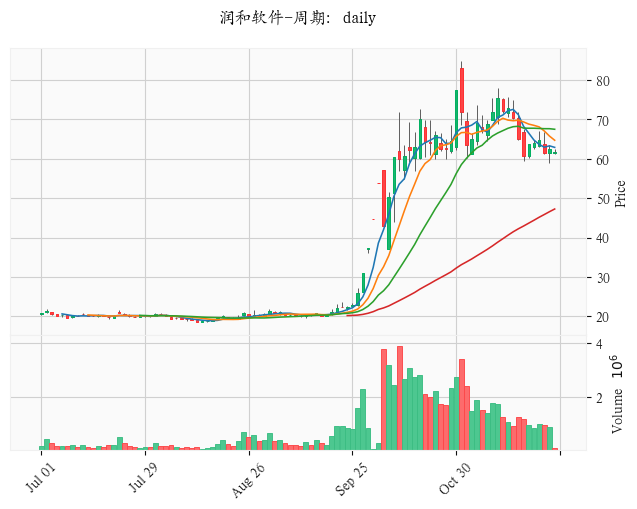

100K线图


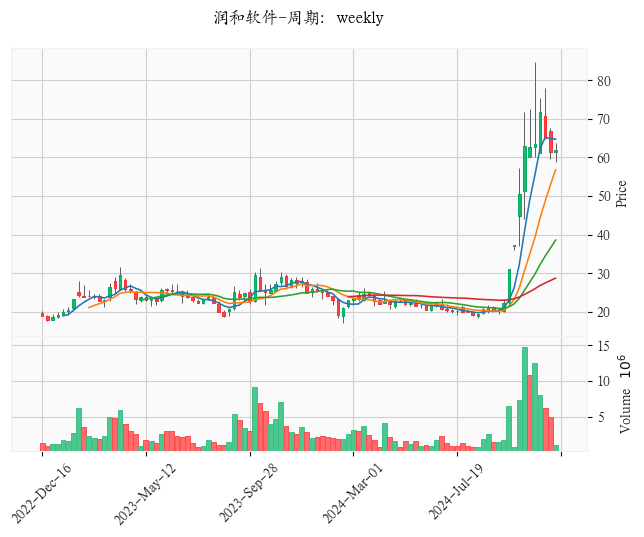

100K线图


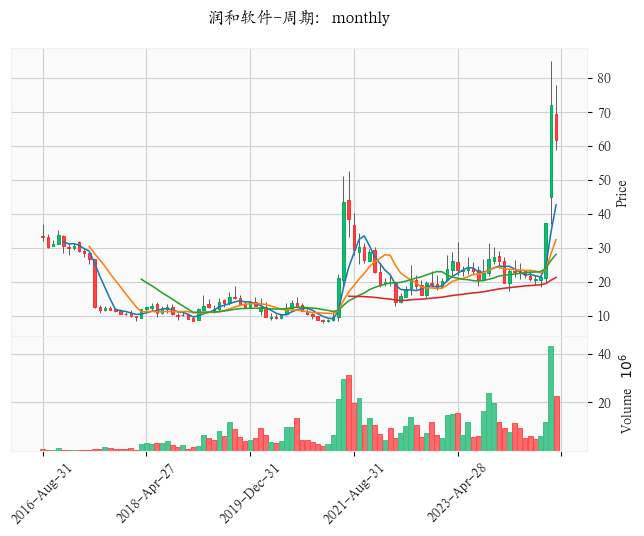

In [15]:
stocksymb='300339'
periods=['daily','weekly','monthly']
stockDict=plotDcStocks(stocksymb,periods)

### 4.1.2 盘口信息汇总
#### 4.1.2.1 成交和挂单明细

获取腾讯当日历史分笔数据

In [16]:
# 根据code代码返回“交易所+代码” 信息，或者反过来
def transferExSym(code):
    if len(code)>6:
        rescode=code[-6:]
    else:
        source={}
        source['sh']=ak.stock_sh_a_spot_em()['代码'].to_list()
        source['sz']=ak.stock_sz_a_spot_em()['代码'].to_list()
        source['bj']=ak.stock_bj_a_spot_em()['代码'].to_list()
        for k in source.keys():
            if code in source[k]:
                rescode=k+code
                break
    return rescode

In [17]:
import numpy as np
import matplotlib.pyplot as plt

#区分北交所和沪深股市，刻画市场深度。按照涨跌停板，作为极值，按照价格涨幅的measure度量区间
def priceMarketDepth(df,measure=0.01):

    open_price = df.loc[df['成交时间'] == '09:30:00', '成交价格'].iloc[0]

    # 设置涨跌停板系数
    if stocksymb == 'bj':
        limit_factor = 0.2
    else:
        limit_factor = 0.1

    # 计算最高价和最低价
    high_price = open_price * (1 + limit_factor)
    low_price = open_price * (1 - limit_factor)

    # 定义价格区间，每1%一档
    price_bins = np.round(np.arange(low_price, high_price, (high_price - low_price) * measure),2)

    # 将价格按照区间划分
    df['价格区间'] = pd.cut(df['成交价格'], bins=price_bins, right=False)

    # 按照价格区间汇总成交量
    volume_summary = df.groupby('价格区间',observed=False)['成交量'].sum().reset_index()

    # 新建 df['prop'] 列
    df['prop'] = df['性质'].apply(lambda x: -1 if x == '卖盘' else (1 if x == '买盘' else 0))
    
    # 按照价格区间汇总成交量和 prop 之和
    summary = df.groupby('价格区间',observed=False).agg({
        '成交量': 'sum',
        'prop': 'sum'
    }).reset_index()
    
    # 提取价格区间的中点和边界
    summary['价格'] = summary['价格区间'].apply(lambda x: round(x.mid,2))
    summary['起始价格'] = summary['价格区间'].apply(lambda x: round(x.left,2))
    summary['终止价格'] = summary['价格区间'].apply(lambda x: round(x.right,2))

    # 分离买盘和卖盘数据
    summary['买盘深度'] = summary['prop'].apply(lambda x: x if x > 0 else 0)
    summary['卖盘深度'] = -summary['prop'].apply(lambda x: -x if x < 0 else 0)

    # 绘制市场深度水平条形图
    fig, ax = plt.subplots(figsize=(14, 21))

    # 绘制买卖盘深度图
    ax.barh(summary['价格'], summary['买盘深度'], color='green', label='buy')
    ax.barh(summary['价格'], summary['卖盘深度'], color='red', label='sell')
    
    # 在图上标注区间价格的起始和终止价格
    for index, row in summary.iterrows():
        ax.text(row['买盘深度'] + max(summary['买盘深度'].max(), summary['卖盘深度'].max())*measure, row['价格'], f'{row["起始价格"]:.2f}', va='center', ha='left', fontsize=8, color='black')
        ax.text(-row['卖盘深度'] - max(summary['买盘深度'].max(), summary['卖盘深度'].max())*measure, row['价格'], f'{row["终止价格"]:.2f}', va='center', ha='right', fontsize=8, color='black')

    # 设置图表标题和标签
    ax.set_title('Market Depth')
    ax.set_xlabel('Depth(Amount)')
    ax.set_ylabel('Price')
    ax.legend()

    
    # 显示图表
    plt.show()
    
    return summary

In [18]:
from rich.console import Console
from rich.table import Table

#美观显示DataFrame表格
class DataFramePretty(object):
    def __init__(self, df: pd.DataFrame, min_max_cols=[]) -> None:
        self.data = df
        self.min_max_cols = min_max_cols

    def __set_min_max_style(self, df: pd.DataFrame):
        imax = self.data.idxmax()
        imin = self.data.idxmin()

        max_tmpl = "[b on red3]{}[/b on red3]"
        min_tmpl = "[i on green3]{}[/i on green3]"

        for col in self.min_max_cols:
            col_idx = imax.index.tolist().index(col)
            val = df.iloc[imax[col], col_idx]
            df.iloc[imax[col], col_idx] = max_tmpl.format(val)

            col_idx = imin.index.tolist().index(col)
            val = df.iloc[imin[col], col_idx]
            df.iloc[imin[col], col_idx] = min_tmpl.format(val)

    def show(self):
        table = Table(
            title="DataFrame",
            title_style="i on dark_cyan",
            header_style="bold cyan",
        )

        # self.data是原始数据
        # df 是用来显示的数据
        df = self.data.copy()
        for col in df.columns:
            df[col] = df[col].astype("str")
            table.add_column(col)

        self.__set_min_max_style(df)

        for idx in range(len(df)):
            table.add_row(*df.iloc[idx].tolist())

        console = Console()
        console.print(table)

In [19]:
#剔除中性单以后，列出活跃买卖市场深度
def plotActiveMarketDepth(stocksymbol):
    
    print(f'市场深度：{stocksymb}')
    #一次性获得历史分笔数据（当天即当天之前的交易时间；隔天即昨天）
    yesterdayTicks=ak.stock_zh_a_tick_tx_js(symbol=transferExSym(stocksymb))
    
    md=priceMarketDepth(yesterdayTicks)
    md = md[(md['买盘深度'] != 0) | (md['卖盘深度'] != 0)]
    mdp=DataFramePretty(md)
    mdp.show()
    return  md

剔除中性盘以后，主动买卖盘的市场深度

市场深度：300339


/Users/mac/anaconda3/lib/python3.11/site-packages/akshare/stock/stock_zh_a_tick_tx.py:26: UserWarning: 正在下载数据，请稍等
  warnings.warn("正在下载数据，请稍等")


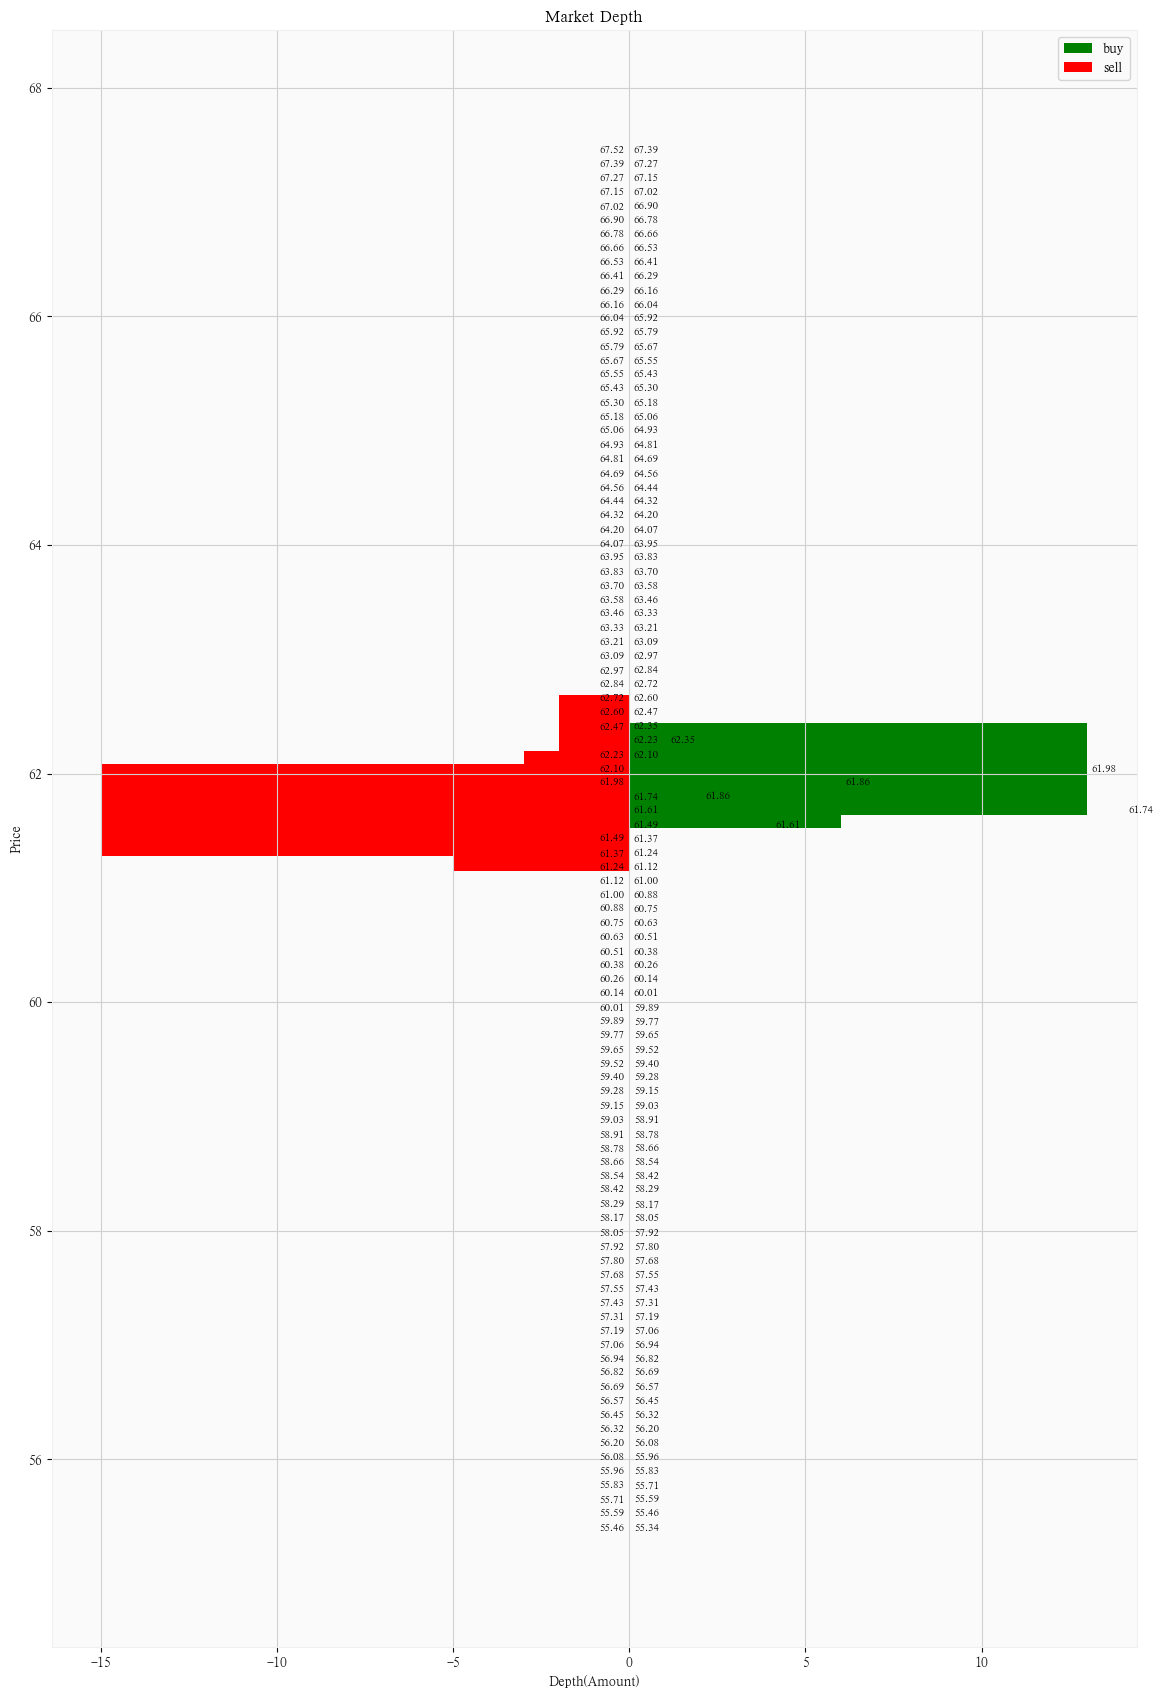

                                      DataFrame                                       
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ 价格区间       ┃ 成交量 ┃ prop ┃ 价格  ┃ 起始价格 ┃ 终止价格 ┃ 买盘深度 ┃ 卖盘深度 ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ [61.49, 61.61) │ 15749  │ -5   │ 61.55 │ 61.49    │ 61.61    │ 0        │ -5       │
│ [61.61, 61.74) │ 10170  │ -15  │ 61.68 │ 61.61    │ 61.74    │ 0        │ -15      │
│ [61.74, 61.86) │ 37109  │ -3   │ 61.8  │ 61.74    │ 61.86    │ 0        │ -3       │
│ [61.86, 61.98) │ 24005  │ 6    │ 61.92 │ 61.86    │ 61.98    │ 6        │ 0        │
│ [61.98, 62.1)  │ 5931   │ 13   │ 62.04 │ 61.98    │ 62.1     │ 13       │ 0        │
│ [62.23, 62.35) │ 3639   │ -2   │ 62.29 │ 62.23    │ 62.35    │ 0        │ -2       │
└────────────────┴────────┴──────┴───────┴──────────┴──────────┴──────────┴──────────┘

,价格区间,成交量,prop,价格,起始价格,终止价格,买盘深度,卖盘深度
50,"[61.49, 61.61)",15749,-5,61.55,61.49,61.61,0,-5
51,"[61.61, 61.74)",10170,-15,61.68,61.61,61.74,0,-15
52,"[61.74, 61.86)",37109,-3,61.80,61.74,61.86,0,-3
53,"[61.86, 61.98)",24005,6,61.92,61.86,61.98,6,0
54,"[61.98, 62.1)",5931,13,62.04,61.98,62.10,13,0
56,"[62.23, 62.35)",3639,-2,62.29,62.23,62.35,0,-2


In [20]:
plotActiveMarketDepth(stocksymb)

### 4.1.3 个股追踪
追踪股票列表

In [21]:
focusStocks=['300576','600839','600157','000717','002607','600127','600605','600217','300727','301421','002843','600968','300159','601688']
getInfo=getStockInfo(focusStocks)
Analist=pd.DataFrame({'代码':focusStocks,'名称':getInfo['名称'],'IPO':getInfo['IPO'],'行业':getInfo['行业'],'流通股':getInfo['流通股'],'总股本':getInfo['总股本']})
Analist['流通股']=Analist['流通股'].astype(int)
Analist['总股本']=Analist['总股本'].astype(int)
Analist['流通率']=Analist['流通股']/Analist['总股本']
Analist

,代码,名称,IPO,行业,流通股,总股本,流通率
0,300576,容大感光,20161220,电子化学品,183530814,295708699,0.620647
1,600839,四川长虹,19940311,家电行业,4614958631,4616244222,0.999722
2,600157,永泰能源,19980513,电力行业,22217764145,22217764145,1.000000
3,000717,中南股份,19970508,钢铁行业,2423523840,2423845590,0.999867
4,002607,中公教育,20110810,教育,5028744315,6167399389,0.815375
5,600127,金健米业,19980506,农牧饲渔,641783218,641783218,1.000000
6,600605,汇通能源,19920327,房地产服务,206282429,206282429,1.000000
7,600217,中再资环,19991216,环保行业,1388659782,1657653673,0.837726
8,300727,润禾材料,20171127,化学制品,113888282,127725100,0.891667
9,301421,波长光电,20230823,光学光电子,46308485,115718000,0.400184


In [22]:
import akshare as ak
import dolphindb as ddb
import pandas as pd
import time
from datetime import datetime
from concurrent.futures import ThreadPoolExecutor

# 初始化 DolphinDB 连接
s = ddb.session()
s.connect("localhost", 8848, "admin", "123456")  # 替换为实际的主机、端口、用户名和密码

# 创建 DolphinDB 表
s.run("""
if (existsDatabase("dfs://Quote")) {
    dropDatabase("dfs://Quote")
}
t = table(1:0, `timestamp`sym`sell_5`sell_5_vol`sell_4`sell_4_vol`sell_3`sell_3_vol`sell_2`sell_2_vol`sell_1`sell_1_vol`buy_1`buy_1_vol`buy_2`buy_2_vol`buy_3`buy_3_vol`buy_4`buy_4_vol`buy_5`buy_5_vol`最新`均价`涨幅`涨跌`总手`金额`换手`量比`最高`最低`今开`昨收`涨停`跌停`外盘`内盘, [TIMESTAMP, SYMBOL, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE])
database("dfs://Quote", VALUE, t)
""")

def is_within_trading_hours(current_time):
    # 定义交易时间段
    morning_start = current_time.replace(hour=9, minute=15, second=0, microsecond=0)
    morning_end = current_time.replace(hour=11, minute=30, second=0, microsecond=0)
    afternoon_start = current_time.replace(hour=13, minute=0, second=0, microsecond=0)
    afternoon_end = current_time.replace(hour=15, minute=0, microsecond=0)
    
    return (morning_start <= current_time <= morning_end) or (afternoon_start <= current_time <= afternoon_end)

def fetch_and_store(symbol):
    # 获取当前时间
    current_time = datetime.now()

    if is_within_trading_hours(current_time):fgggttryy
        # 获取股票数据
        df = ak.stock_bid_ask_em(symbol=symbol)

        # 转换为字典
        data_dict = df.set_index('item').to_dict()['value']

        # 添加时间戳和股票代码到数据字典
        data_dict['timestamp'] = current_time
        data_dict['sym'] = symbol

        # 转换数据为 DataFrame
        transformed_df = pd.DataFrame([data_dict])

        # 将数据插入到 DolphinDB
        s.upload({"data": transformed_df})
        s.run("""
        append!(loadTable("dfs://Quote", "t"), data)
        """)]]
        ]

while True:
    
    # 使用多线程获取多个股票代码的数据
    with ThreadPoolExecutor(max_workers=len(focusStocks)) as executor:
        executor.map(fetch_and_store, focusStocks)

    # 每3秒检查一次
    time.sleep(3)


IndentationError: unexpected indent (1055247357.py, line 36)